In [1]:
# Imperium Data Challenge – XAUUSD 2025

## Setup
import pandas as pd
import numpy as np

# For plotting later
import matplotlib.pyplot as plt

# Make pandas output easier to read
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

print("Setup OK")
excel_path = "data_challenge_imperium.xlsx"

orders = pd.read_excel(excel_path, sheet_name="orders")
deals  = pd.read_excel(excel_path, sheet_name="deals")

# Convert to nullable integers, allowing NaN
orders["Order"] = pd.to_numeric(orders["Order"], errors="coerce").astype("Int64")
deals["Order"]  = pd.to_numeric(deals["Order"], errors="coerce").astype("Int64")
deals["Deal"]   = pd.to_numeric(deals["Deal"], errors="coerce").astype("Int64")

print(orders.dtypes[["Order"]])
print(deals.dtypes[["Order", "Deal"]])

display(orders.head())
display(deals.head())



Setup OK
Order    Int64
dtype: object
Order    Int64
Deal     Int64
dtype: object


,Open Time,Order,Symbol,Type,Volume,Unnamed: 5,Price,S / L,T / P,Time,Unnamed: 10,State,Comment
0,2025.01.07 02:00:00,2,XAUUSD,buy,1 / 1,NaN,0.0,2563.44,2662.84,2025.01.07 02:00:00,NaN,filled,IMPERIUM
1,2025.01.07 15:54:40,3,XAUUSD,sell,1 / 1,NaN,0.0,NaN,NaN,2025.01.07 15:54:40,NaN,filled,tp 2662.84
2,2025.01.08 07:00:00,4,XAUUSD,buy,1 / 1,NaN,0.0,2576.69,2674.83,2025.01.08 07:00:00,NaN,filled,IMPERIUM
3,2025.01.09 14:58:40,5,XAUUSD,sell,1 / 1,NaN,0.0,NaN,NaN,2025.01.09 14:58:40,NaN,filled,tp 2674.83
4,2025.01.13 15:00:00,6,XAUUSD,buy,1 / 1,NaN,0.0,2629.36,2728.21,2025.01.13 15:00:00,NaN,filled,IMPERIUM


,Time,Deal,Symbol,Type,Direction,Volume,Price,Order,Commission,Swap,Profit,Balance,Comment
0,2025.01.01 00:00:00,1,NaN,balance,NaN,NaN,NaN,<NA>,0,0,10000.00,10000.00,NaN
1,2025.01.07 02:00:00,2,XAUUSD,buy,in,1.0,2634.91,2,0,0,0.00,10000.00,IMPERIUM
2,2025.01.07 15:54:40,3,XAUUSD,sell,out,1.0,2662.84,3,0,0,27.93,10027.93,tp 2662.84
3,2025.01.08 07:00:00,4,XAUUSD,buy,in,1.0,2647.28,4,0,0,0.00,10027.93,IMPERIUM
4,2025.01.09 14:58:40,5,XAUUSD,sell,out,1.0,2674.83,5,0,0,27.55,10055.48,tp 2674.83


In [14]:
# --- types already fixed before this step ---
# orders["Order"] = pd.to_numeric(orders["Order"], errors="coerce").astype("Int64")
# deals["Order"]  = pd.to_numeric(deals["Order"],  errors="coerce").astype("Int64")
# deals["Deal"]   = pd.to_numeric(deals["Deal"],   errors="coerce").astype("Int64")

# Parse datetime columns we actually need
orders["open_time"] = pd.to_datetime(orders["Open Time"])
deals["time"]       = pd.to_datetime(deals["Time"])

# Drop useless unnamed columns in orders
cols_to_drop = [c for c in orders.columns if "Unnamed" in c]
orders = orders.drop(columns=cols_to_drop)

# Rename to simpler names
orders_clean = orders.rename(columns={
    "Order": "order_id",
    "Symbol": "symbol",
    "Type": "order_type",
    "Price": "order_price",
    "S / L": "sl",
    "T / P": "tp",
    "State": "state",
    "Comment": "order_comment",
})

deals_clean = deals.rename(columns={
    "Deal": "deal_id",
    "Type": "deal_type",
    "Direction": "direction",
    "Price": "price",
    "Order": "order_id",
    "Profit": "profit",
    "Balance": "balance",
    "Comment": "deal_comment",
})

print("orders_clean columns:", orders_clean.columns.tolist())
print("deals_clean columns:", deals_clean.columns.tolist())

display(orders_clean.head())
display(deals_clean.head())

orders_clean columns: ['Open Time', 'order_id', 'symbol', 'order_type', 'Volume', 'order_price', 'sl', 'tp', 'Time', 'state', 'order_comment', 'open_time']
deals_clean columns: ['Time', 'deal_id', 'Symbol', 'deal_type', 'direction', 'Volume', 'price', 'order_id', 'Commission', 'Swap', 'profit', 'balance', 'deal_comment', 'time']


,Open Time,order_id,symbol,order_type,Volume,order_price,sl,tp,Time,state,order_comment,open_time
0,2025.01.07 02:00:00,2,XAUUSD,buy,1 / 1,0.0,2563.44,2662.84,2025.01.07 02:00:00,filled,IMPERIUM,2025-01-07 02:00:00
1,2025.01.07 15:54:40,3,XAUUSD,sell,1 / 1,0.0,NaN,NaN,2025.01.07 15:54:40,filled,tp 2662.84,2025-01-07 15:54:40
2,2025.01.08 07:00:00,4,XAUUSD,buy,1 / 1,0.0,2576.69,2674.83,2025.01.08 07:00:00,filled,IMPERIUM,2025-01-08 07:00:00
3,2025.01.09 14:58:40,5,XAUUSD,sell,1 / 1,0.0,NaN,NaN,2025.01.09 14:58:40,filled,tp 2674.83,2025-01-09 14:58:40
4,2025.01.13 15:00:00,6,XAUUSD,buy,1 / 1,0.0,2629.36,2728.21,2025.01.13 15:00:00,filled,IMPERIUM,2025-01-13 15:00:00


,Time,deal_id,Symbol,deal_type,direction,Volume,price,order_id,Commission,Swap,profit,balance,deal_comment,time
0,2025.01.01 00:00:00,1,NaN,balance,NaN,NaN,NaN,<NA>,0,0,10000.00,10000.00,NaN,2025-01-01 00:00:00
1,2025.01.07 02:00:00,2,XAUUSD,buy,in,1.0,2634.91,2,0,0,0.00,10000.00,IMPERIUM,2025-01-07 02:00:00
2,2025.01.07 15:54:40,3,XAUUSD,sell,out,1.0,2662.84,3,0,0,27.93,10027.93,tp 2662.84,2025-01-07 15:54:40
3,2025.01.08 07:00:00,4,XAUUSD,buy,in,1.0,2647.28,4,0,0,0.00,10027.93,IMPERIUM,2025-01-08 07:00:00
4,2025.01.09 14:58:40,5,XAUUSD,sell,out,1.0,2674.83,5,0,0,27.55,10055.48,tp 2674.83,2025-01-09 14:58:40


In [2]:
## print 5 min candles frame 


csv_path = "XAUUSD_5min_candles.csv"

# Try the most common MetaTrader-like formats
# 1) Comma separator, default encoding
# Re-read with semicolon separator
try:
    candles_raw = pd.read_csv(csv_path, sep=";")
except UnicodeDecodeError:
    candles_raw = pd.read_csv(csv_path, sep=";", encoding="utf-16")

print("Raw candles shape (sep=';'):", candles_raw.shape)
candles_raw.head()


Raw candles shape (sep=';'): (100022, 19)


,Timestamp,Open,High,Low,Close,Spread (Pips),RSI(14),"MA(20,SMA)",MACD Main,MACD Signal,ATR(14),ADX(14),plusDI(14),minusDI(14),StochK(14),StochD(14),BB_Upper,BB_Mid,BB_Lower
0,2024.06.25 20:10,2316.61,2318.21,2316.44,2317.37,68.0,1.797693e+308,1.797693e+308,1.797693e+308,1.797693e+308,1.797693e+308,0.000000,0.000000,0.000000,1.797693e+308,1.797693e+308,0.0,0.0,0.0
1,2024.06.25 20:15,2317.38,2318.15,2317.21,2317.97,69.0,1.797693e+308,1.797693e+308,1.797693e+308,1.797693e+308,1.797693e+308,0.000000,0.000000,0.000000,1.797693e+308,1.797693e+308,0.0,0.0,0.0
2,2024.06.25 20:20,2317.97,2318.17,2316.98,2317.99,70.0,1.797693e+308,1.797693e+308,1.797693e+308,1.797693e+308,1.797693e+308,13.333333,0.000000,2.577031,1.797693e+308,1.797693e+308,0.0,0.0,0.0
3,2024.06.25 20:25,2318.01,2318.78,2317.47,2318.76,73.0,1.797693e+308,1.797693e+308,1.797693e+308,1.797693e+308,1.797693e+308,17.833985,6.208651,2.233427,1.797693e+308,1.797693e+308,0.0,0.0,0.0
4,2024.06.25 20:30,2318.65,2318.74,2317.88,2318.60,70.0,1.797693e+308,1.797693e+308,1.797693e+308,1.797693e+308,1.797693e+308,21.734551,5.380831,1.935636,1.797693e+308,1.797693e+308,0.0,0.0,0.0


In [34]:
# --- types already fixed before this step ---
# orders["Order"] = pd.to_numeric(orders["Order"], errors="coerce").astype("Int64")
# deals["Order"]  = pd.to_numeric(deals["Order"],  errors="coerce").astype("Int64")
# deals["Deal"]   = pd.to_numeric(deals["Deal"],   errors="coerce").astype("Int64")

# Parse datetime columns we actually need
orders["open_time"] = pd.to_datetime(orders["Open Time"])
deals["time"]       = pd.to_datetime(deals["Time"])

# Drop useless unnamed columns in orders
cols_to_drop = [c for c in orders.columns if "Unnamed" in c]
orders = orders.drop(columns=cols_to_drop)

# Rename to simpler names
orders_clean = orders.rename(columns={
    "Order": "order_id",
    "Symbol": "symbol",
    "Type": "order_type",
    "Price": "order_price",
    "S / L": "sl",
    "T / P": "tp",
    "State": "state",
    "Comment": "order_comment",
})

deals_clean = deals.rename(columns={
    "Deal": "deal_id",
    "Type": "deal_type",
    "Direction": "direction",
    "Price": "price",
    "Order": "order_id",
    "Profit": "profit",
    "Balance": "balance",
    "Comment": "deal_comment",
})

print("orders_clean columns:", orders_clean.columns.tolist())
print("deals_clean columns:", deals_clean.columns.tolist())

display(orders_clean.head())
display(deals_clean.head())


orders_clean columns: ['Open Time', 'order_id', 'symbol', 'order_type', 'Volume', 'order_price', 'sl', 'tp', 'Time', 'state', 'order_comment', 'open_time']
deals_clean columns: ['Time', 'deal_id', 'Symbol', 'deal_type', 'direction', 'Volume', 'price', 'order_id', 'Commission', 'Swap', 'profit', 'balance', 'deal_comment', 'time']


,Open Time,order_id,symbol,order_type,Volume,order_price,sl,tp,Time,state,order_comment,open_time
0,2025.01.07 02:00:00,2,XAUUSD,buy,1 / 1,0.0,2563.44,2662.84,2025.01.07 02:00:00,filled,IMPERIUM,2025-01-07 02:00:00
1,2025.01.07 15:54:40,3,XAUUSD,sell,1 / 1,0.0,NaN,NaN,2025.01.07 15:54:40,filled,tp 2662.84,2025-01-07 15:54:40
2,2025.01.08 07:00:00,4,XAUUSD,buy,1 / 1,0.0,2576.69,2674.83,2025.01.08 07:00:00,filled,IMPERIUM,2025-01-08 07:00:00
3,2025.01.09 14:58:40,5,XAUUSD,sell,1 / 1,0.0,NaN,NaN,2025.01.09 14:58:40,filled,tp 2674.83,2025-01-09 14:58:40
4,2025.01.13 15:00:00,6,XAUUSD,buy,1 / 1,0.0,2629.36,2728.21,2025.01.13 15:00:00,filled,IMPERIUM,2025-01-13 15:00:00


,Time,deal_id,Symbol,deal_type,direction,Volume,price,order_id,Commission,Swap,profit,balance,deal_comment,time
0,2025.01.01 00:00:00,1,NaN,balance,NaN,NaN,NaN,<NA>,0,0,10000.00,10000.00,NaN,2025-01-01 00:00:00
1,2025.01.07 02:00:00,2,XAUUSD,buy,in,1.0,2634.91,2,0,0,0.00,10000.00,IMPERIUM,2025-01-07 02:00:00
2,2025.01.07 15:54:40,3,XAUUSD,sell,out,1.0,2662.84,3,0,0,27.93,10027.93,tp 2662.84,2025-01-07 15:54:40
3,2025.01.08 07:00:00,4,XAUUSD,buy,in,1.0,2647.28,4,0,0,0.00,10027.93,IMPERIUM,2025-01-08 07:00:00
4,2025.01.09 14:58:40,5,XAUUSD,sell,out,1.0,2674.83,5,0,0,27.55,10055.48,tp 2674.83,2025-01-09 14:58:40


In [16]:
# Make sure Order column is numeric/int on both
orders["Order"] = pd.to_numeric(orders["Order"], errors="coerce").astype("Int64")
deals["Order"]  = pd.to_numeric(deals["Order"],  errors="coerce").astype("Int64")

# Join ALL orders with ALL deals on Order
order_deals = pd.merge(
    orders,
    deals,
    on="Order",
    how="inner",            # keep only rows where Order exists in both
    suffixes=("_order", "_deal")  # distinguish columns with same name
)

print("order_deals shape:", order_deals.shape)
order_deals.head(50)

order_deals shape: (1723, 25)


,Open Time,Order,Symbol_order,Type_order,Volume_order,Price_order,S / L,T / P,Time_order,State,Comment_order,open_time,Time_deal,Deal,Symbol_deal,Type_deal,Direction,Volume_deal,Price_deal,Commission,Swap,Profit,Balance,Comment_deal,time
0,2025.01.07 02:00:00,2,XAUUSD,buy,1 / 1,0.0,2563.44,2662.84,2025.01.07 02:00:00,filled,IMPERIUM,2025-01-07 02:00:00,2025.01.07 02:00:00,2,XAUUSD,buy,in,1.0,2634.91,0,0,0.00,10000.00,IMPERIUM,2025-01-07 02:00:00
1,2025.01.07 15:54:40,3,XAUUSD,sell,1 / 1,0.0,NaN,NaN,2025.01.07 15:54:40,filled,tp 2662.84,2025-01-07 15:54:40,2025.01.07 15:54:40,3,XAUUSD,sell,out,1.0,2662.84,0,0,27.93,10027.93,tp 2662.84,2025-01-07 15:54:40
2,2025.01.08 07:00:00,4,XAUUSD,buy,1 / 1,0.0,2576.69,2674.83,2025.01.08 07:00:00,filled,IMPERIUM,2025-01-08 07:00:00,2025.01.08 07:00:00,4,XAUUSD,buy,in,1.0,2647.28,0,0,0.00,10027.93,IMPERIUM,2025-01-08 07:00:00
3,2025.01.09 14:58:40,5,XAUUSD,sell,1 / 1,0.0,NaN,NaN,2025.01.09 14:58:40,filled,tp 2674.83,2025-01-09 14:58:40,2025.01.09 14:58:40,5,XAUUSD,sell,out,1.0,2674.83,0,0,27.55,10055.48,tp 2674.83,2025-01-09 14:58:40
4,2025.01.13 15:00:00,6,XAUUSD,buy,1 / 1,0.0,2629.36,2728.21,2025.01.13 15:00:00,filled,IMPERIUM,2025-01-13 15:00:00,2025.01.13 15:00:00,6,XAUUSD,buy,in,1.0,2671.44,0,0,0.00,10055.48,IMPERIUM,2025-01-13 15:00:00
5,2025.01.13 15:00:00,7,XAUUSD,buy,1 / 1,0.0,2607.03,2696.32,2025.01.13 15:00:00,filled,IMPERIUM,2025-01-13 15:00:00,2025.01.13 15:00:00,7,XAUUSD,buy,in,1.0,2671.44,0,0,0.00,10055.48,IMPERIUM,2025-01-13 15:00:00
6,2025.01.13 18:00:00,8,XAUUSD,buy,1 / 1,0.0,2620.20,2719.05,2025.01.13 18:00:00,filled,IMPERIUM,2025-01-13 18:00:00,2025.01.13 18:00:00,8,XAUUSD,buy,in,1.0,2662.12,0,0,0.00,10055.48,IMPERIUM,2025-01-13 18:00:00
7,2025.01.14 12:00:00,9,XAUUSD,buy,1 / 1,0.0,2625.33,2724.77,2025.01.14 12:00:00,filled,IMPERIUM,2025-01-14 12:00:00,2025.01.14 12:00:00,9,XAUUSD,buy,in,1.0,2667.51,0,0,0.00,10055.48,IMPERIUM,2025-01-14 12:00:00
8,2025.01.15 16:00:00,10,XAUUSD,sell,1 / 1,0.0,NaN,NaN,2025.01.15 16:00:00,filled,NaN,2025-01-15 16:00:00,2025.01.15 16:00:00,10,XAUUSD,sell,out,1.0,2693.60,0,0,26.09,10081.57,NaN,2025-01-15 16:00:00
9,2025.01.15 16:00:00,11,XAUUSD,sell,1 / 1,0.0,NaN,NaN,2025.01.15 16:00:00,filled,NaN,2025-01-15 16:00:00,2025.01.15 16:00:00,11,XAUUSD,sell,out,1.0,2693.60,0,0,31.48,10113.05,NaN,2025-01-15 16:00:00


In [17]:
order_deals = order_deals[[
    # Order-side
    "Open Time", "Order", "Symbol_order", "Type_order", "Volume_order",
    "Price_order", "S / L", "T / P", "Time_order", "State", "Comment_order",
    # Deal-side
    "Time_deal", "Deal", "Symbol_deal", "Type_deal", "Direction",
    "Volume_deal", "Price_deal",
    "Profit", "Balance", "Comment_deal",
]]

order_deals.head(50)

,Open Time,Order,Symbol_order,Type_order,Volume_order,Price_order,S / L,T / P,Time_order,State,Comment_order,Time_deal,Deal,Symbol_deal,Type_deal,Direction,Volume_deal,Price_deal,Profit,Balance,Comment_deal
0,2025.01.07 02:00:00,2,XAUUSD,buy,1 / 1,0.0,2563.44,2662.84,2025.01.07 02:00:00,filled,IMPERIUM,2025.01.07 02:00:00,2,XAUUSD,buy,in,1.0,2634.91,0.00,10000.00,IMPERIUM
1,2025.01.07 15:54:40,3,XAUUSD,sell,1 / 1,0.0,NaN,NaN,2025.01.07 15:54:40,filled,tp 2662.84,2025.01.07 15:54:40,3,XAUUSD,sell,out,1.0,2662.84,27.93,10027.93,tp 2662.84
2,2025.01.08 07:00:00,4,XAUUSD,buy,1 / 1,0.0,2576.69,2674.83,2025.01.08 07:00:00,filled,IMPERIUM,2025.01.08 07:00:00,4,XAUUSD,buy,in,1.0,2647.28,0.00,10027.93,IMPERIUM
3,2025.01.09 14:58:40,5,XAUUSD,sell,1 / 1,0.0,NaN,NaN,2025.01.09 14:58:40,filled,tp 2674.83,2025.01.09 14:58:40,5,XAUUSD,sell,out,1.0,2674.83,27.55,10055.48,tp 2674.83
4,2025.01.13 15:00:00,6,XAUUSD,buy,1 / 1,0.0,2629.36,2728.21,2025.01.13 15:00:00,filled,IMPERIUM,2025.01.13 15:00:00,6,XAUUSD,buy,in,1.0,2671.44,0.00,10055.48,IMPERIUM
5,2025.01.13 15:00:00,7,XAUUSD,buy,1 / 1,0.0,2607.03,2696.32,2025.01.13 15:00:00,filled,IMPERIUM,2025.01.13 15:00:00,7,XAUUSD,buy,in,1.0,2671.44,0.00,10055.48,IMPERIUM
6,2025.01.13 18:00:00,8,XAUUSD,buy,1 / 1,0.0,2620.20,2719.05,2025.01.13 18:00:00,filled,IMPERIUM,2025.01.13 18:00:00,8,XAUUSD,buy,in,1.0,2662.12,0.00,10055.48,IMPERIUM
7,2025.01.14 12:00:00,9,XAUUSD,buy,1 / 1,0.0,2625.33,2724.77,2025.01.14 12:00:00,filled,IMPERIUM,2025.01.14 12:00:00,9,XAUUSD,buy,in,1.0,2667.51,0.00,10055.48,IMPERIUM
8,2025.01.15 16:00:00,10,XAUUSD,sell,1 / 1,0.0,NaN,NaN,2025.01.15 16:00:00,filled,NaN,2025.01.15 16:00:00,10,XAUUSD,sell,out,1.0,2693.60,26.09,10081.57,NaN
9,2025.01.15 16:00:00,11,XAUUSD,sell,1 / 1,0.0,NaN,NaN,2025.01.15 16:00:00,filled,NaN,2025.01.15 16:00:00,11,XAUUSD,sell,out,1.0,2693.60,31.48,10113.05,NaN


In [18]:
mask = (
    (order_deals["Profit"] == 0) &
    (order_deals["Comment_deal"] == "IMPERIUM") &
    (order_deals["Comment_order"] == "IMPERIUM")
)

count_zero_profit_imperium = mask.sum()
count_zero_profit_imperium

430

In [19]:
order_deals_zero_profit_imperium = order_deals[mask].copy()
order_deals_zero_profit_imperium.head(430)

,Open Time,Order,Symbol_order,Type_order,Volume_order,Price_order,S / L,T / P,Time_order,State,Comment_order,Time_deal,Deal,Symbol_deal,Type_deal,Direction,Volume_deal,Price_deal,Profit,Balance,Comment_deal
0,2025.01.07 02:00:00,2,XAUUSD,buy,1 / 1,0.0,2563.44,2662.84,2025.01.07 02:00:00,filled,IMPERIUM,2025.01.07 02:00:00,2,XAUUSD,buy,in,1.0,2634.91,0.0,10000.00,IMPERIUM
2,2025.01.08 07:00:00,4,XAUUSD,buy,1 / 1,0.0,2576.69,2674.83,2025.01.08 07:00:00,filled,IMPERIUM,2025.01.08 07:00:00,4,XAUUSD,buy,in,1.0,2647.28,0.0,10027.93,IMPERIUM
4,2025.01.13 15:00:00,6,XAUUSD,buy,1 / 1,0.0,2629.36,2728.21,2025.01.13 15:00:00,filled,IMPERIUM,2025.01.13 15:00:00,6,XAUUSD,buy,in,1.0,2671.44,0.0,10055.48,IMPERIUM
5,2025.01.13 15:00:00,7,XAUUSD,buy,1 / 1,0.0,2607.03,2696.32,2025.01.13 15:00:00,filled,IMPERIUM,2025.01.13 15:00:00,7,XAUUSD,buy,in,1.0,2671.44,0.0,10055.48,IMPERIUM
6,2025.01.13 18:00:00,8,XAUUSD,buy,1 / 1,0.0,2620.20,2719.05,2025.01.13 18:00:00,filled,IMPERIUM,2025.01.13 18:00:00,8,XAUUSD,buy,in,1.0,2662.12,0.0,10055.48,IMPERIUM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,2025.11.19 13:00:00,852,XAUUSD,buy,1 / 1,0.0,4008.75,4194.61,2025.11.19 13:00:00,filled,IMPERIUM,2025.11.19 13:00:00,852,XAUUSD,buy,in,1.0,4109.16,0.0,14411.02,IMPERIUM
851,2025.11.19 22:00:00,853,XAUUSD,buy,1 / 1,0.0,3973.36,4173.36,2025.11.19 22:00:00,filled,IMPERIUM,2025.11.19 22:00:00,853,XAUUSD,buy,in,1.0,4073.82,0.0,14411.02,IMPERIUM
853,2025.11.20 13:00:00,855,XAUUSD,buy,1 / 1,0.0,3959.88,4159.88,2025.11.20 13:00:00,filled,IMPERIUM,2025.11.20 13:00:00,855,XAUUSD,buy,in,1.0,4060.29,0.0,14400.42,IMPERIUM
856,2025.11.20 19:00:00,858,XAUUSD,buy,1 / 1,0.0,3948.44,4148.44,2025.11.20 19:00:00,filled,IMPERIUM,2025.11.20 19:00:00,858,XAUUSD,buy,in,1.0,4048.90,0.0,14405.46,IMPERIUM


In [30]:
# Parse deal time if not already
order_deals["Time_deal_dt"] = pd.to_datetime(order_deals["Time_deal"])

# Sort chronologically
order_deals_sorted = order_deals.sort_values("Time_deal_dt").reset_index(drop=True)

order_deals_sorted[[
    "Time_deal_dt", "Deal", "Type_deal", "Direction",
    "Price_deal", "Profit", "Balance",
    "Order", "Comment_deal", "Comment_order"
]].head()




,Time_deal_dt,Deal,Type_deal,Direction,Price_deal,Profit,Balance,Order,Comment_deal,Comment_order
0,2025-01-01,1,balance,NaN,NaN,10000.0,10000.0,<NA>,NaN,NaN
1,2025-01-01,1,balance,NaN,NaN,10000.0,10000.0,<NA>,NaN,NaN
2,2025-01-01,1,balance,NaN,NaN,10000.0,10000.0,<NA>,NaN,NaN
3,2025-01-01,1,balance,NaN,NaN,10000.0,10000.0,<NA>,NaN,NaN
4,2025-01-01,1,balance,NaN,NaN,10000.0,10000.0,<NA>,NaN,NaN


In [103]:
entry_link = trades_df[[
    "entry_deal", "exit_order", "exit_deal", "exit_time",
    "exit_price", "exit_balance", "profit", "exit_comment_deal", "exit_comment_order"
]].rename(columns={"entry_deal": "Deal"})

order_deals_with_exit = order_deals.merge(
    entry_link,
    on="Deal",
    how="left"
)

order_deals_with_exit.head()

,Open Time,Order,Symbol_order,Type_order,Volume_order,Price_order,S / L,T / P,Time_order,State,Comment_order,Time_deal,Deal,Symbol_deal,Type_deal,Direction,Volume_deal,Price_deal,Profit,Balance,Comment_deal,Time_deal_dt,exit_order,exit_deal,exit_time,exit_price,exit_balance,profit,exit_comment_deal,exit_comment_order
0,2025.01.07 02:00:00,2,XAUUSD,buy,1 / 1,0.0,2563.44,2662.84,2025.01.07 02:00:00,filled,IMPERIUM,2025.01.07 02:00:00,2,XAUUSD,buy,in,1.0,2634.91,0.00,10000.00,IMPERIUM,2025-01-07 02:00:00,3.0,3.0,2025-01-07 15:54:40,2662.84,10027.93,27.93,tp 2662.84,tp 2662.84
1,2025.01.07 15:54:40,3,XAUUSD,sell,1 / 1,0.0,NaN,NaN,2025.01.07 15:54:40,filled,tp 2662.84,2025.01.07 15:54:40,3,XAUUSD,sell,out,1.0,2662.84,27.93,10027.93,tp 2662.84,2025-01-07 15:54:40,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,2025.01.08 07:00:00,4,XAUUSD,buy,1 / 1,0.0,2576.69,2674.83,2025.01.08 07:00:00,filled,IMPERIUM,2025.01.08 07:00:00,4,XAUUSD,buy,in,1.0,2647.28,0.00,10027.93,IMPERIUM,2025-01-08 07:00:00,5.0,5.0,2025-01-09 14:58:40,2674.83,10055.48,27.55,tp 2674.83,tp 2674.83
3,2025.01.09 14:58:40,5,XAUUSD,sell,1 / 1,0.0,NaN,NaN,2025.01.09 14:58:40,filled,tp 2674.83,2025.01.09 14:58:40,5,XAUUSD,sell,out,1.0,2674.83,27.55,10055.48,tp 2674.83,2025-01-09 14:58:40,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4,2025.01.13 15:00:00,6,XAUUSD,buy,1 / 1,0.0,2629.36,2728.21,2025.01.13 15:00:00,filled,IMPERIUM,2025.01.13 15:00:00,6,XAUUSD,buy,in,1.0,2671.44,0.00,10055.48,IMPERIUM,2025-01-13 15:00:00,12.0,12.0,2025-01-15 16:00:00,2693.60,10135.21,22.16,NaN,NaN


In [104]:
candles.columns.tolist()


['Timestamp',
 'Open',
 'High',
 'Low',
 'Close',
 'Spread (Pips)',
 'RSI(14)',
 'MA(20,SMA)',
 'MACD Main',
 'MACD Signal',
 'ATR(14)',
 'ADX(14)',
 'plusDI(14)',
 'minusDI(14)',
 'StochK(14)',
 'StochD(14)',
 'BB_Upper',
 'BB_Mid',
 'BB_Lower',
 'candle_time']

In [36]:
open_trades = []   # queue of open entries
trades = []        # final list of entry-exit pairs

for _, row in order_deals_sorted.iterrows():
    # --- ENTRY CONDITION ---
    is_entry = (
        (row["Type_deal"] == "buy") &
        (row["Direction"] == "in") &
        (row["Profit"] == 0) &
        (row["Comment_order"] == "IMPERIUM")
    )
    
    if is_entry:
        open_trades.append({
            "entry_order": row["Order"],
            "entry_deal": row["Deal"],
            "entry_time": row["Time_deal_dt"],
            "entry_price": row["Price_deal"],
            "entry_balance": row["Balance"],
            "entry_comment_deal": row["Comment_deal"],
            "entry_comment_order": row["Comment_order"],
        })
        continue

    # --- EXIT CONDITION ---
    is_exit = (
        (row["Type_deal"] == "sell") &
        (row["Direction"] == "out") &
        (row["Comment_order"] != "IMPERIUM")  # tp / sl / end-of-test ( I need to keep this in mind )
        # Profit can be 0 in rare end-of-test housekeeping; we still treat as exit
    )
    
    if is_exit and open_trades:
        entry = open_trades.pop(0)  # FIFO: oldest open entry
        
        trades.append({
            **entry,
            "exit_order": row["Order"],
            "exit_deal": row["Deal"],
            "exit_time": row["Time_deal_dt"],
            "exit_price": row["Price_deal"],
            "exit_balance": row["Balance"],
            "profit": row["Profit"],
            "exit_comment_deal": row["Comment_deal"],
            "exit_comment_order": row["Comment_order"],
        })

trades_df = pd.DataFrame(trades)
print("Number of matched trades:", len(trades_df))
print("Still open trades (should be 0):", len(open_trades))

trades_df.head(20)


Number of matched trades: 430
Still open trades (should be 0): 0


,entry_order,entry_deal,entry_time,entry_price,entry_balance,entry_comment_deal,entry_comment_order,exit_order,exit_deal,exit_time,exit_price,exit_balance,profit,exit_comment_deal,exit_comment_order
0,2,2,2025-01-07 02:00:00,2634.91,10000.00,IMPERIUM,IMPERIUM,3,3,2025-01-07 15:54:40,2662.84,10027.93,27.93,tp 2662.84,tp 2662.84
1,4,4,2025-01-08 07:00:00,2647.28,10027.93,IMPERIUM,IMPERIUM,5,5,2025-01-09 14:58:40,2674.83,10055.48,27.55,tp 2674.83,tp 2674.83
2,6,6,2025-01-13 15:00:00,2671.44,10055.48,IMPERIUM,IMPERIUM,12,12,2025-01-15 16:00:00,2693.60,10135.21,22.16,NaN,NaN
3,7,7,2025-01-13 15:00:00,2671.44,10055.48,IMPERIUM,IMPERIUM,10,10,2025-01-15 16:00:00,2693.60,10081.57,26.09,NaN,NaN
4,8,8,2025-01-13 18:00:00,2662.12,10055.48,IMPERIUM,IMPERIUM,11,11,2025-01-15 16:00:00,2693.60,10113.05,31.48,NaN,NaN
5,9,9,2025-01-14 12:00:00,2667.51,10055.48,IMPERIUM,IMPERIUM,13,13,2025-01-15 22:59:40,2696.32,10160.09,24.88,tp 2696.32,tp 2696.32
6,14,14,2025-01-17 08:00:00,2711.96,10160.09,IMPERIUM,IMPERIUM,16,16,2025-01-17 15:00:00,2710.76,10165.62,5.53,NaN,NaN
7,15,15,2025-01-17 12:00:00,2705.23,10160.09,IMPERIUM,IMPERIUM,20,20,2025-01-21 05:00:00,2724.37,10178.03,12.41,NaN,NaN
8,17,17,2025-01-17 16:00:00,2705.19,10165.62,IMPERIUM,IMPERIUM,23,23,2025-01-21 15:00:00,2726.58,10247.41,21.39,NaN,NaN
9,18,18,2025-01-20 02:00:00,2696.86,10165.62,IMPERIUM,IMPERIUM,22,22,2025-01-21 15:00:00,2726.58,10226.02,29.72,NaN,NaN


In [37]:
#  (focus on copy)
candles = candles_raw.copy()

# verify cols
print("Candles columns:", candles.columns.tolist())

Candles columns: ['Timestamp', 'Open', 'High', 'Low', 'Close', 'Spread (Pips)', 'RSI(14)', 'MA(20,SMA)', 'MACD Main', 'MACD Signal', 'ATR(14)', 'ADX(14)', 'plusDI(14)', 'minusDI(14)', 'StochK(14)', 'StochD(14)', 'BB_Upper', 'BB_Mid', 'BB_Lower']


In [38]:
# createdatetime standard
candles["candle_time"] = pd.to_datetime(candles["Timestamp"])

# Trier par temps
candles = candles.sort_values("candle_time").reset_index(drop=True)

candles[["candle_time", "Open", "High", "Low", "Close"]].head()


,candle_time,Open,High,Low,Close
0,2024-06-25 20:10:00,2316.61,2318.21,2316.44,2317.37
1,2024-06-25 20:15:00,2317.38,2318.15,2317.21,2317.97
2,2024-06-25 20:20:00,2317.97,2318.17,2316.98,2317.99
3,2024-06-25 20:25:00,2318.01,2318.78,2317.47,2318.76
4,2024-06-25 20:30:00,2318.65,2318.74,2317.88,2318.60


In [39]:
# make sure entries are date time 
trades_df["entry_time"] = pd.to_datetime(trades_df["entry_time"])
trades_df["exit_time"]  = pd.to_datetime(trades_df["exit_time"])

trades_df = trades_df.sort_values("entry_time").reset_index(drop=True)

# prepare candles
candles_entry = candles.copy().add_prefix("entry_")  # entry_candle_time, entry_Open, ...

trades_with_entry = pd.merge_asof(
    trades_df,
    candles_entry,
    left_on="entry_time",
    right_on="entry_candle_time",
    direction="backward",   # last candle <= entry_time
)

trades_with_entry[
    ["entry_time", "entry_price", "entry_candle_time",
     "entry_Open", "entry_High", "entry_Low", "entry_Close"]
].head()


,entry_time,entry_price,entry_candle_time,entry_Open,entry_High,entry_Low,entry_Close
0,2025-01-07 02:00:00,2634.91,2025-01-07 02:00:00,2634.29,2634.82,2634.01,2634.01
1,2025-01-08 07:00:00,2647.28,2025-01-08 07:00:00,2646.64,2646.93,2646.46,2646.57
2,2025-01-13 15:00:00,2671.44,2025-01-13 15:00:00,2670.66,2671.91,2668.46,2670.48
3,2025-01-13 15:00:00,2671.44,2025-01-13 15:00:00,2670.66,2671.91,2668.46,2670.48
4,2025-01-13 18:00:00,2662.12,2025-01-13 18:00:00,2661.50,2662.95,2660.39,2662.82


In [40]:
# Preparation of EXIT
candles_exit = candles.copy().add_prefix("exit_")   # exit_candle_time, exit_Open, ...

trades_with_entry = trades_with_entry.sort_values("exit_time").reset_index(drop=True)

trades_full = pd.merge_asof(
    trades_with_entry,
    candles_exit,
    left_on="exit_time",
    right_on="exit_candle_time",
    direction="backward",
)

trades_full[
    ["entry_time", "entry_candle_time",
     "exit_time", "exit_candle_time",
     "entry_Open", "exit_Open", "profit"]
].head()


,entry_time,entry_candle_time,exit_time,exit_candle_time,entry_Open,exit_Open,profit
0,2025-01-07 02:00:00,2025-01-07 02:00:00,2025-01-07 15:54:40,2025-01-07 15:50:00,2634.29,2659.94,27.93
1,2025-01-08 07:00:00,2025-01-08 07:00:00,2025-01-09 14:58:40,2025-01-09 14:55:00,2646.64,2673.57,27.55
2,2025-01-13 15:00:00,2025-01-13 15:00:00,2025-01-15 16:00:00,2025-01-15 16:00:00,2670.66,2693.45,22.16
3,2025-01-13 15:00:00,2025-01-13 15:00:00,2025-01-15 16:00:00,2025-01-15 16:00:00,2670.66,2693.45,26.09
4,2025-01-13 18:00:00,2025-01-13 18:00:00,2025-01-15 16:00:00,2025-01-15 16:00:00,2661.50,2693.45,31.48


In [41]:
base_cols = [
    "entry_order",
    "entry_deal",
    "entry_time",
    "entry_price",
    "entry_balance",
    "entry_comment_deal",
    "entry_comment_order",
    "exit_order",
    "exit_deal",
    "exit_time",
    "exit_price",
    "exit_balance",
    "profit",
    "exit_comment_deal",
    "exit_comment_order",
]

trades_base = trades_df[base_cols].copy()

# Ensure times are datetime
trades_base["entry_time"] = pd.to_datetime(trades_base["entry_time"])
trades_base["exit_time"]  = pd.to_datetime(trades_base["exit_time"])

trades_base = trades_base.sort_values("entry_time").reset_index(drop=True)
trades_base.head()


,entry_order,entry_deal,entry_time,entry_price,entry_balance,entry_comment_deal,entry_comment_order,exit_order,exit_deal,exit_time,exit_price,exit_balance,profit,exit_comment_deal,exit_comment_order
0,2,2,2025-01-07 02:00:00,2634.91,10000.00,IMPERIUM,IMPERIUM,3,3,2025-01-07 15:54:40,2662.84,10027.93,27.93,tp 2662.84,tp 2662.84
1,4,4,2025-01-08 07:00:00,2647.28,10027.93,IMPERIUM,IMPERIUM,5,5,2025-01-09 14:58:40,2674.83,10055.48,27.55,tp 2674.83,tp 2674.83
2,6,6,2025-01-13 15:00:00,2671.44,10055.48,IMPERIUM,IMPERIUM,12,12,2025-01-15 16:00:00,2693.60,10135.21,22.16,NaN,NaN
3,7,7,2025-01-13 15:00:00,2671.44,10055.48,IMPERIUM,IMPERIUM,10,10,2025-01-15 16:00:00,2693.60,10081.57,26.09,NaN,NaN
4,8,8,2025-01-13 18:00:00,2662.12,10055.48,IMPERIUM,IMPERIUM,11,11,2025-01-15 16:00:00,2693.60,10113.05,31.48,NaN,NaN


In [42]:
cols_5m = [
    "Timestamp",
    "Open",
    "High",
    "Low",
    "Close",
    "Spread (Pips)",
    "RSI(14)",
    "MA(20,SMA)",
    "MACD Main",
    "MACD Signal",
    "ATR(14)",
    "ADX(14)",
    "plusDI(14)",
    "minusDI(14)",
    "StochK(14)",
    "StochD(14)",
    "BB_Upper",
    "BB_Mid",
    "BB_Lower",
]

candles = candles_raw[cols_5m].copy()

# Standard datetime column for merge_asof
candles["candle_time"] = pd.to_datetime(candles["Timestamp"])
candles = candles.sort_values("candle_time").reset_index(drop=True)

candles.head()


,Timestamp,Open,High,Low,Close,Spread (Pips),RSI(14),"MA(20,SMA)",MACD Main,MACD Signal,ATR(14),ADX(14),plusDI(14),minusDI(14),StochK(14),StochD(14),BB_Upper,BB_Mid,BB_Lower,candle_time
0,2024.06.25 20:10,2316.61,2318.21,2316.44,2317.37,68.0,1.797693e+308,1.797693e+308,1.797693e+308,1.797693e+308,1.797693e+308,0.000000,0.000000,0.000000,1.797693e+308,1.797693e+308,0.0,0.0,0.0,2024-06-25 20:10:00
1,2024.06.25 20:15,2317.38,2318.15,2317.21,2317.97,69.0,1.797693e+308,1.797693e+308,1.797693e+308,1.797693e+308,1.797693e+308,0.000000,0.000000,0.000000,1.797693e+308,1.797693e+308,0.0,0.0,0.0,2024-06-25 20:15:00
2,2024.06.25 20:20,2317.97,2318.17,2316.98,2317.99,70.0,1.797693e+308,1.797693e+308,1.797693e+308,1.797693e+308,1.797693e+308,13.333333,0.000000,2.577031,1.797693e+308,1.797693e+308,0.0,0.0,0.0,2024-06-25 20:20:00
3,2024.06.25 20:25,2318.01,2318.78,2317.47,2318.76,73.0,1.797693e+308,1.797693e+308,1.797693e+308,1.797693e+308,1.797693e+308,17.833985,6.208651,2.233427,1.797693e+308,1.797693e+308,0.0,0.0,0.0,2024-06-25 20:25:00
4,2024.06.25 20:30,2318.65,2318.74,2317.88,2318.60,70.0,1.797693e+308,1.797693e+308,1.797693e+308,1.797693e+308,1.797693e+308,21.734551,5.380831,1.935636,1.797693e+308,1.797693e+308,0.0,0.0,0.0,2024-06-25 20:30:00


In [43]:
# Prepare candles for ENTRY: keep ALL columns, just prefix them
candles_entry = candles.copy().add_prefix("entry_")
# columns: entry_Timestamp, entry_Open, ..., entry_BB_Lower, entry_candle_time

# Merge last candle <= entry_time
trades_with_entry = pd.merge_asof(
    trades_base.sort_values("entry_time"),
    candles_entry,
    left_on="entry_time",
    right_on="entry_candle_time",
    direction="backward",
)

# Optional: check what entry_* columns you got
entry_cols = [c for c in trades_with_entry.columns if c.startswith("entry_")]
entry_cols


['entry_order',
 'entry_deal',
 'entry_time',
 'entry_price',
 'entry_balance',
 'entry_comment_deal',
 'entry_comment_order',
 'entry_Timestamp',
 'entry_Open',
 'entry_High',
 'entry_Low',
 'entry_Close',
 'entry_Spread (Pips)',
 'entry_RSI(14)',
 'entry_MA(20,SMA)',
 'entry_MACD Main',
 'entry_MACD Signal',
 'entry_ATR(14)',
 'entry_ADX(14)',
 'entry_plusDI(14)',
 'entry_minusDI(14)',
 'entry_StochK(14)',
 'entry_StochD(14)',
 'entry_BB_Upper',
 'entry_BB_Mid',
 'entry_BB_Lower',
 'entry_candle_time']

In [44]:
# Prepare candles for EXIT: same, keep ALL columns and prefix
candles_exit = candles.copy().add_prefix("exit_")
# columns: exit_Timestamp, exit_Open, ..., exit_BB_Lower, exit_candle_time

trades_with_entry = trades_with_entry.sort_values("exit_time").reset_index(drop=True)

trades_full = pd.merge_asof(
    trades_with_entry,
    candles_exit,
    left_on="exit_time",
    right_on="exit_candle_time",
    direction="backward",
)

# Optional: check exit_* columns
exit_cols = [c for c in trades_full.columns if c.startswith("exit_")]
exit_cols[:10]


['exit_order',
 'exit_deal',
 'exit_time',
 'exit_price',
 'exit_balance',
 'exit_comment_deal',
 'exit_comment_order',
 'exit_Timestamp',
 'exit_Open',
 'exit_High']

In [120]:
cols_5m = [
    "Timestamp",
    "Open",
    "High",
    "Low",
    "Close",
    "Spread (Pips)",
    "RSI(14)",
    "MA(20,SMA)",
    "MACD Main",
    "MACD Signal",
    "ATR(14)",
    "ADX(14)",
    "plusDI(14)",
    "minusDI(14)",
    "StochK(14)",
    "StochD(14)",
    "BB_Upper",
    "BB_Mid",
    "BB_Lower",
]

# Keep exactly those columns + build a standard datetime index
candles = candles_raw[cols_5m].copy()
candles["candle_time"] = pd.to_datetime(candles["Timestamp"])
candles = candles.sort_values("candle_time").reset_index(drop=True)

candles.head()


,Timestamp,Open,High,Low,Close,Spread (Pips),RSI(14),"MA(20,SMA)",MACD Main,MACD Signal,ATR(14),ADX(14),plusDI(14),minusDI(14),StochK(14),StochD(14),BB_Upper,BB_Mid,BB_Lower,candle_time
0,2024.06.25 20:10,2316.61,2318.21,2316.44,2317.37,68.0,1.797693e+308,1.797693e+308,1.797693e+308,1.797693e+308,1.797693e+308,0.000000,0.000000,0.000000,1.797693e+308,1.797693e+308,0.0,0.0,0.0,2024-06-25 20:10:00
1,2024.06.25 20:15,2317.38,2318.15,2317.21,2317.97,69.0,1.797693e+308,1.797693e+308,1.797693e+308,1.797693e+308,1.797693e+308,0.000000,0.000000,0.000000,1.797693e+308,1.797693e+308,0.0,0.0,0.0,2024-06-25 20:15:00
2,2024.06.25 20:20,2317.97,2318.17,2316.98,2317.99,70.0,1.797693e+308,1.797693e+308,1.797693e+308,1.797693e+308,1.797693e+308,13.333333,0.000000,2.577031,1.797693e+308,1.797693e+308,0.0,0.0,0.0,2024-06-25 20:20:00
3,2024.06.25 20:25,2318.01,2318.78,2317.47,2318.76,73.0,1.797693e+308,1.797693e+308,1.797693e+308,1.797693e+308,1.797693e+308,17.833985,6.208651,2.233427,1.797693e+308,1.797693e+308,0.0,0.0,0.0,2024-06-25 20:25:00
4,2024.06.25 20:30,2318.65,2318.74,2317.88,2318.60,70.0,1.797693e+308,1.797693e+308,1.797693e+308,1.797693e+308,1.797693e+308,21.734551,5.380831,1.935636,1.797693e+308,1.797693e+308,0.0,0.0,0.0,2024-06-25 20:30:00


In [123]:
# Ensure times are datetime
trades_df["entry_time"] = pd.to_datetime(trades_df["entry_time"])
trades_df["exit_time"]  = pd.to_datetime(trades_df["exit_time"])

# Base trade columns you want to keep
base_cols = [
    "entry_order",
    "entry_deal",
    "entry_time",
    "entry_price",
    "entry_balance",
    "entry_comment_deal",
    "entry_comment_order",
    "exit_order",
    "exit_deal",
    "exit_time",
    "exit_price",
    "exit_balance",
    "profit",
    "exit_comment_deal",
    "exit_comment_order",
]

trades_base = trades_df[base_cols].sort_values("entry_time").reset_index(drop=True)

# Prepare candles for ENTRY: keep ALL 5m columns, just prefix them
candles_entry = candles.copy().add_prefix("entry_")
# entry_Timestamp, entry_Open, ..., entry_BB_Lower, entry_candle_time

import pandas as pd

trades_with_entry = pd.merge_asof(
    trades_base,
    candles_entry,
    left_on="entry_time",
    right_on="entry_candle_time",
    direction="backward",  # use last candle <= entry_time
)

# Quick check always ( Todo try to add other checks later )
trades_with_entry[
    ["entry_time", "entry_price", "entry_Timestamp", "entry_Open", "entry_Close"]
].head()


,entry_time,entry_price,entry_Timestamp,entry_Open,entry_Close
0,2025-01-07 02:00:00,2634.91,2025.01.07 02:00,2634.29,2634.01
1,2025-01-08 07:00:00,2647.28,2025.01.08 07:00,2646.64,2646.57
2,2025-01-13 15:00:00,2671.44,2025.01.13 15:00,2670.66,2670.48
3,2025-01-13 15:00:00,2671.44,2025.01.13 15:00,2670.66,2670.48
4,2025-01-13 18:00:00,2662.12,2025.01.13 18:00,2661.50,2662.82


In [124]:
# Prepare candles for EXIT
candles_exit = candles.copy().add_prefix("exit_")
# -> exit_Timestamp, exit_Open, ..., exit_BB_Lower, exit_candle_time

trades_with_entry = trades_with_entry.sort_values("exit_time").reset_index(drop=True)

trades_with_5m = pd.merge_asof(
    trades_with_entry,
    candles_exit,
    left_on="exit_time",
    right_on="exit_candle_time",
    direction="backward",
)

# Final check: see both entry and exit specs for one trade
trades_with_5m[
    [
        "entry_time", "entry_Timestamp", "entry_Open", "entry_High", "entry_Low", "entry_Close",
        "exit_time",  "exit_Timestamp",  "exit_Open",  "exit_High",  "exit_Low",  "exit_Close",
        "profit",
    ]
].head()


,entry_time,entry_Timestamp,entry_Open,entry_High,entry_Low,entry_Close,exit_time,exit_Timestamp,exit_Open,exit_High,exit_Low,exit_Close,profit
0,2025-01-07 02:00:00,2025.01.07 02:00,2634.29,2634.82,2634.01,2634.01,2025-01-07 15:54:40,2025.01.07 15:50,2659.94,2663.10,2659.45,2662.52,27.93
1,2025-01-08 07:00:00,2025.01.08 07:00,2646.64,2646.93,2646.46,2646.57,2025-01-09 14:58:40,2025.01.09 14:55,2673.57,2674.79,2672.83,2673.63,27.55
2,2025-01-13 15:00:00,2025.01.13 15:00,2670.66,2671.91,2668.46,2670.48,2025-01-15 16:00:00,2025.01.15 16:00,2693.45,2695.66,2692.84,2693.44,22.16
3,2025-01-13 15:00:00,2025.01.13 15:00,2670.66,2671.91,2668.46,2670.48,2025-01-15 16:00:00,2025.01.15 16:00,2693.45,2695.66,2692.84,2693.44,26.09
4,2025-01-13 18:00:00,2025.01.13 18:00,2661.50,2662.95,2660.39,2662.82,2025-01-15 16:00:00,2025.01.15 16:00,2693.45,2695.66,2692.84,2693.44,31.48


In [125]:
trades_df.head()
# columns:
# entry_order	entry_deal	entry_time	entry_price	entry_balance	entry_comment_deal	entry_comment_order
# exit_order	exit_deal	exit_time	exit_price	exit_balance	profit	exit_comment_deal	exit_comment_order



,entry_order,entry_deal,entry_time,entry_price,entry_balance,entry_comment_deal,entry_comment_order,exit_order,exit_deal,exit_time,exit_price,exit_balance,profit,exit_comment_deal,exit_comment_order,entry_Timestamp,entry_Open,entry_High,entry_Low,entry_Close,entry_Spread (Pips),entry_RSI(14),"entry_MA(20,SMA)",entry_MACD Main,entry_MACD Signal,...,entry_StochD(14),entry_BB_Upper,entry_BB_Mid,entry_BB_Lower,entry_candle_time,exit_Timestamp,exit_Open,exit_High,exit_Low,exit_Close,exit_Spread (Pips),exit_RSI(14),"exit_MA(20,SMA)",exit_MACD Main,exit_MACD Signal,exit_ATR(14),exit_ADX(14),exit_plusDI(14),exit_minusDI(14),exit_StochK(14),exit_StochD(14),exit_BB_Upper,exit_BB_Mid,exit_BB_Lower,exit_candle_time
0,2,2,2025-01-07 02:00:00,2634.91,10000.00,IMPERIUM,IMPERIUM,3,3,2025-01-07 15:54:40,2662.84,10027.93,27.93,tp 2662.84,tp 2662.84,2025.01.07 02:00,2634.29,2634.82,2634.01,2634.01,77.0,42.620151,2635.0030,-0.294777,-0.147821,...,26.164572,2636.780100,2635.0030,2633.225900,2025-01-07 02:00:00,2025.01.07 15:50,2659.94,2663.10,2659.45,2662.52,72.0,79.379008,2654.0605,3.892873,3.260228,2.865000,74.323777,32.680442,3.692500,90.974146,87.594666,2664.073822,2654.0605,2644.047178,2025-01-07 15:50:00
1,4,4,2025-01-08 07:00:00,2647.28,10027.93,IMPERIUM,IMPERIUM,5,5,2025-01-09 14:58:40,2674.83,10055.48,27.55,tp 2674.83,tp 2674.83,2025.01.08 07:00,2646.64,2646.93,2646.46,2646.57,76.0,47.794010,2646.5685,-0.343829,-0.313849,...,29.497203,2647.616933,2646.5685,2645.520067,2025-01-08 07:00:00,2025.01.09 14:55,2673.57,2674.79,2672.83,2673.63,72.0,63.136294,2671.2330,1.615099,1.618977,1.822143,16.761756,22.935000,11.833418,74.668969,72.537114,2674.713271,2671.2330,2667.752729,2025-01-09 14:55:00
2,6,6,2025-01-13 15:00:00,2671.44,10055.48,IMPERIUM,IMPERIUM,12,12,2025-01-15 16:00:00,2693.60,10135.21,22.16,NaN,NaN,2025.01.13 15:00,2670.66,2671.91,2668.46,2670.48,93.0,36.264467,2672.9465,-2.480894,-2.872501,...,48.455858,2679.952644,2672.9465,2665.940356,2025-01-13 15:00:00,2025.01.15 16:00,2693.45,2695.66,2692.84,2693.44,75.0,71.761377,2686.1825,1.401451,0.173960,3.524286,23.900975,32.685136,9.961715,80.998650,69.120279,2691.956486,2686.1825,2680.408514,2025-01-15 16:00:00
3,7,7,2025-01-13 15:00:00,2671.44,10055.48,IMPERIUM,IMPERIUM,10,10,2025-01-15 16:00:00,2693.60,10081.57,26.09,NaN,NaN,2025.01.13 15:00,2670.66,2671.91,2668.46,2670.48,93.0,36.264467,2672.9465,-2.480894,-2.872501,...,48.455858,2679.952644,2672.9465,2665.940356,2025-01-13 15:00:00,2025.01.15 16:00,2693.45,2695.66,2692.84,2693.44,75.0,71.761377,2686.1825,1.401451,0.173960,3.524286,23.900975,32.685136,9.961715,80.998650,69.120279,2691.956486,2686.1825,2680.408514,2025-01-15 16:00:00
4,8,8,2025-01-13 18:00:00,2662.12,10055.48,IMPERIUM,IMPERIUM,11,11,2025-01-15 16:00:00,2693.60,10113.05,31.48,NaN,NaN,2025.01.13 18:00,2661.50,2662.95,2660.39,2662.82,76.0,38.552739,2667.3570,-1.708195,-1.053718,...,9.494796,2673.386989,2667.3570,2661.327011,2025-01-13 18:00:00,2025.01.15 16:00,2693.45,2695.66,2692.84,2693.44,75.0,71.761377,2686.1825,1.401451,0.173960,3.524286,23.900975,32.685136,9.961715,80.998650,69.120279,2691.956486,2686.1825,2680.408514,2025-01-15 16:00:00


In [47]:
trades_df["entry_time"] = pd.to_datetime(trades_df["entry_time"])
trades_df["exit_time"]  = pd.to_datetime(trades_df["exit_time"])


In [48]:

cols_5m = [
    "Timestamp",
    "Open",
    "High",
    "Low",
    "Close",
    "Spread (Pips)",
    "RSI(14)",
    "MA(20,SMA)",
    "MACD Main",
    "MACD Signal",
    "ATR(14)",
    "ADX(14)",
    "plusDI(14)",
    "minusDI(14)",
    "StochK(14)",
    "StochD(14)",
    "BB_Upper",
    "BB_Mid",
    "BB_Lower",
]

candles = candles_raw[cols_5m].copy()
candles["candle_time"] = pd.to_datetime(candles["Timestamp"])
candles = candles.sort_values("candle_time").reset_index(drop=True)

In [49]:
candles = candles_raw[cols_5m].copy()
candles["candle_time"] = pd.to_datetime(candles["Timestamp"])
candles = candles.sort_values("candle_time").reset_index(drop=True)

In [50]:
# Prepare full 5-min data for ENTRY
candles_entry = candles.copy().add_prefix("entry_")
# -> entry_Timestamp, entry_Open, ..., entry_BB_Lower, entry_candle_time

# Merge: for each trade, take last 5-min bar <= entry_time
trades_with_entry = pd.merge_asof(
    trades_df.sort_values("entry_time"),
    candles_entry,
    left_on="entry_time",
    right_on="entry_candle_time",
    direction="backward",
)

# trades_with_entry now has:
# all original trades_df columns + all entry_* columns ( I need to take a break after this )

In [51]:
[c for c in trades_with_entry.columns if c.startswith("entry_")]


['entry_order',
 'entry_deal',
 'entry_time',
 'entry_price',
 'entry_balance',
 'entry_comment_deal',
 'entry_comment_order',
 'entry_Timestamp',
 'entry_Open',
 'entry_High',
 'entry_Low',
 'entry_Close',
 'entry_Spread (Pips)',
 'entry_RSI(14)',
 'entry_MA(20,SMA)',
 'entry_MACD Main',
 'entry_MACD Signal',
 'entry_ATR(14)',
 'entry_ADX(14)',
 'entry_plusDI(14)',
 'entry_minusDI(14)',
 'entry_StochK(14)',
 'entry_StochD(14)',
 'entry_BB_Upper',
 'entry_BB_Mid',
 'entry_BB_Lower',
 'entry_candle_time']

In [52]:
# Prepare full 5-min data for EXIT
candles_exit = candles.copy().add_prefix("exit_")
# -> exit_Timestamp, exit_Open, ..., exit_BB_Lower, exit_candle_time

trades_with_entry = trades_with_entry.sort_values("exit_time").reset_index(drop=True)

trades_with_indicators = pd.merge_asof(
    trades_with_entry,
    candles_exit,
    left_on="exit_time",
    right_on="exit_candle_time",
    direction="backward",
)

In [53]:
trades_df = trades_with_indicators

In [54]:
trades_df.head()

,entry_order,entry_deal,entry_time,entry_price,entry_balance,entry_comment_deal,entry_comment_order,exit_order,exit_deal,exit_time,exit_price,exit_balance,profit,exit_comment_deal,exit_comment_order,entry_Timestamp,entry_Open,entry_High,entry_Low,entry_Close,entry_Spread (Pips),entry_RSI(14),"entry_MA(20,SMA)",entry_MACD Main,entry_MACD Signal,...,entry_StochD(14),entry_BB_Upper,entry_BB_Mid,entry_BB_Lower,entry_candle_time,exit_Timestamp,exit_Open,exit_High,exit_Low,exit_Close,exit_Spread (Pips),exit_RSI(14),"exit_MA(20,SMA)",exit_MACD Main,exit_MACD Signal,exit_ATR(14),exit_ADX(14),exit_plusDI(14),exit_minusDI(14),exit_StochK(14),exit_StochD(14),exit_BB_Upper,exit_BB_Mid,exit_BB_Lower,exit_candle_time
0,2,2,2025-01-07 02:00:00,2634.91,10000.00,IMPERIUM,IMPERIUM,3,3,2025-01-07 15:54:40,2662.84,10027.93,27.93,tp 2662.84,tp 2662.84,2025.01.07 02:00,2634.29,2634.82,2634.01,2634.01,77.0,42.620151,2635.0030,-0.294777,-0.147821,...,26.164572,2636.780100,2635.0030,2633.225900,2025-01-07 02:00:00,2025.01.07 15:50,2659.94,2663.10,2659.45,2662.52,72.0,79.379008,2654.0605,3.892873,3.260228,2.865000,74.323777,32.680442,3.692500,90.974146,87.594666,2664.073822,2654.0605,2644.047178,2025-01-07 15:50:00
1,4,4,2025-01-08 07:00:00,2647.28,10027.93,IMPERIUM,IMPERIUM,5,5,2025-01-09 14:58:40,2674.83,10055.48,27.55,tp 2674.83,tp 2674.83,2025.01.08 07:00,2646.64,2646.93,2646.46,2646.57,76.0,47.794010,2646.5685,-0.343829,-0.313849,...,29.497203,2647.616933,2646.5685,2645.520067,2025-01-08 07:00:00,2025.01.09 14:55,2673.57,2674.79,2672.83,2673.63,72.0,63.136294,2671.2330,1.615099,1.618977,1.822143,16.761756,22.935000,11.833418,74.668969,72.537114,2674.713271,2671.2330,2667.752729,2025-01-09 14:55:00
2,6,6,2025-01-13 15:00:00,2671.44,10055.48,IMPERIUM,IMPERIUM,12,12,2025-01-15 16:00:00,2693.60,10135.21,22.16,NaN,NaN,2025.01.13 15:00,2670.66,2671.91,2668.46,2670.48,93.0,36.264467,2672.9465,-2.480894,-2.872501,...,48.455858,2679.952644,2672.9465,2665.940356,2025-01-13 15:00:00,2025.01.15 16:00,2693.45,2695.66,2692.84,2693.44,75.0,71.761377,2686.1825,1.401451,0.173960,3.524286,23.900975,32.685136,9.961715,80.998650,69.120279,2691.956486,2686.1825,2680.408514,2025-01-15 16:00:00
3,7,7,2025-01-13 15:00:00,2671.44,10055.48,IMPERIUM,IMPERIUM,10,10,2025-01-15 16:00:00,2693.60,10081.57,26.09,NaN,NaN,2025.01.13 15:00,2670.66,2671.91,2668.46,2670.48,93.0,36.264467,2672.9465,-2.480894,-2.872501,...,48.455858,2679.952644,2672.9465,2665.940356,2025-01-13 15:00:00,2025.01.15 16:00,2693.45,2695.66,2692.84,2693.44,75.0,71.761377,2686.1825,1.401451,0.173960,3.524286,23.900975,32.685136,9.961715,80.998650,69.120279,2691.956486,2686.1825,2680.408514,2025-01-15 16:00:00
4,8,8,2025-01-13 18:00:00,2662.12,10055.48,IMPERIUM,IMPERIUM,11,11,2025-01-15 16:00:00,2693.60,10113.05,31.48,NaN,NaN,2025.01.13 18:00,2661.50,2662.95,2660.39,2662.82,76.0,38.552739,2667.3570,-1.708195,-1.053718,...,9.494796,2673.386989,2667.3570,2661.327011,2025-01-13 18:00:00,2025.01.15 16:00,2693.45,2695.66,2692.84,2693.44,75.0,71.761377,2686.1825,1.401451,0.173960,3.524286,23.900975,32.685136,9.961715,80.998650,69.120279,2691.956486,2686.1825,2680.408514,2025-01-15 16:00:00


In [100]:
trades_df.shape


(430, 55)

In [119]:
trades_df.columns

Index(['entry_order', 'entry_deal', 'entry_time', 'entry_price', 'entry_balance', 'entry_comment_deal',
       'entry_comment_order', 'exit_order', 'exit_deal', 'exit_time', 'exit_price', 'exit_balance', 'profit',
       'exit_comment_deal', 'exit_comment_order', 'entry_Timestamp', 'entry_Open', 'entry_High', 'entry_Low',
       'entry_Close', 'entry_Spread (Pips)', 'entry_RSI(14)', 'entry_MA(20,SMA)', 'entry_MACD Main',
       'entry_MACD Signal', 'entry_ATR(14)', 'entry_ADX(14)', 'entry_plusDI(14)', 'entry_minusDI(14)',
       'entry_StochK(14)', 'entry_StochD(14)', 'entry_BB_Upper', 'entry_BB_Mid', 'entry_BB_Lower', 'entry_candle_time',
       'exit_Timestamp', 'exit_Open', 'exit_High', 'exit_Low', 'exit_Close', 'exit_Spread (Pips)', 'exit_RSI(14)',
       'exit_MA(20,SMA)', 'exit_MACD Main', 'exit_MACD Signal', 'exit_ATR(14)', 'exit_ADX(14)', 'exit_plusDI(14)',
       'exit_minusDI(14)', 'exit_StochK(14)', 'exit_StochD(14)', 'exit_BB_Upper', 'exit_BB_Mid', 'exit_BB_Lower',
       '

In [104]:
trades_df.to_csv("trades_df.csv", index=False)


In [126]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import f_oneway

# ================================
# 1) LOAD YOUR DATA Yaaaaaaaaay it works
# ================================
df = pd.read_csv("trades_df.csv")  # adjust path if needed

# ================================
# 2) CREATE DURATION + OTHER DERIVED COLUMNS
# ================================
# Convert entry/exit time to datetime
df["entry_time"] = pd.to_datetime(df["entry_time"])
df["exit_time"] = pd.to_datetime(df["exit_time"])

# Duration in hours
df["duration_hours"] = (
    df["exit_time"] - df["entry_time"]
).dt.total_seconds() / 3600.0

# (Optionally you can also keep minutes if you want)
df["trade_duration_minutes"] = (
    df["exit_time"] - df["entry_time"]
).dt.total_seconds() / 60.0

# ================================
# 3) SELECT FEATURES FOR CLUSTERING (FIRST TEST)
# ================================
# You can change this list if you want to experiment
feature_cols = [
    "profit",
    "duration_hours",
    "entry_RSI(14)",
    "entry_MACD Main",
    "entry_MACD Signal",
    "entry_ADX(14)",
    "entry_ATR(14)",
]

# Keep only rows with all these features available
X = df[feature_cols].dropna().copy()
valid_idx = X.index  # to map clusters back to df

print("Number of trades used for clustering:", len(X))

# ================================
# 4) RUN KMEANS CLUSTERING
# ================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 4  # you can change to 3, 5, etc. to test
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=20)
clusters = kmeans.fit_predict(X_scaled)

# Attach cluster labels back to original df
df.loc[valid_idx, "cluster"] = clusters

print("\nCluster counts:")
print(df["cluster"].value_counts().sort_index())
print()

# Optional: see cluster centers in original scale
cluster_centers_scaled = kmeans.cluster_centers_
cluster_centers = pd.DataFrame(
    scaler.inverse_transform(cluster_centers_scaled),
    columns=feature_cols,
)
print("Cluster centers (denormalized):")
print(cluster_centers)
print()

# ================================
# 5) ANOVA TEST ACROSS CLUSTERS
# ================================
metrics_for_anova = [
    "profit",
    "duration_hours",
    "entry_RSI(14)",
    "entry_ADX(14)",
    "entry_ATR(14)",
]

anova_results = {}

# Only use rows that have a cluster assigned
df_valid = df.dropna(subset=["cluster"]).copy()
df_valid["cluster"] = df_valid["cluster"].astype(int)

for metric in metrics_for_anova:
    groups = [
        df_valid[df_valid["cluster"] == c][metric].dropna()
        for c in sorted(df_valid["cluster"].unique())
    ]
    F_stat, p_value = f_oneway(*groups)
    anova_results[metric] = {"F_stat": F_stat, "p_value": p_value}

print("=== ANOVA RESULTS ===")
for metric, res in anova_results.items():
    print(
        f"{metric}: F = {res['F_stat']:.4f}, p = {res['p_value']:.4e}"
    )

# ================================
# 6) SAVE RESULTING DATAFRAME
# ================================
df.to_csv("trades_with_clusters.csv", index=False)
print("\nSaved with clusters to: trades_with_clusters.csv")
# main classification done time for a rest to do next day ploting 

Number of trades used for clustering: 430

Cluster counts:
cluster
0.0    200
1.0     93
2.0     76
3.0     61
Name: count, dtype: int64

Cluster centers (denormalized):
      profit  duration_hours  entry_RSI(14)  entry_MACD Main  entry_MACD Signal  entry_ADX(14)  entry_ATR(14)
0  11.591950       18.347054      49.454380        -0.142865          -0.039823      24.871720       3.284546
1  17.536344       79.629809      36.025937        -2.354424          -1.877401      42.617625       2.726490
2   3.926711       15.784645      32.517611        -6.796565          -6.170014      41.598793       6.645113
3   3.306885       16.370219      66.773064         4.175717           3.915691      44.228704       3.616756

=== ANOVA RESULTS ===
profit: F = 4.1927, p = 6.1018e-03
duration_hours: F = 91.8777, p = 7.2255e-46
entry_RSI(14): F = 226.5218, p = 7.8183e-88
entry_ADX(14): F = 121.3562, p = 8.1659e-57
entry_ATR(14): F = 100.4499, p = 3.4708e-49

Saved with clusters to: trades_with_clusters.

In [58]:
df["duration_hours"] = (df["exit_time"] - df["entry_time"]).dt.total_seconds() / 3600.0


In [59]:
import pandas as pd

df = pd.read_csv("trades_with_clusters.csv")
df = df.dropna(subset=["cluster"]).copy()
df["cluster"] = df["cluster"].astype(int)

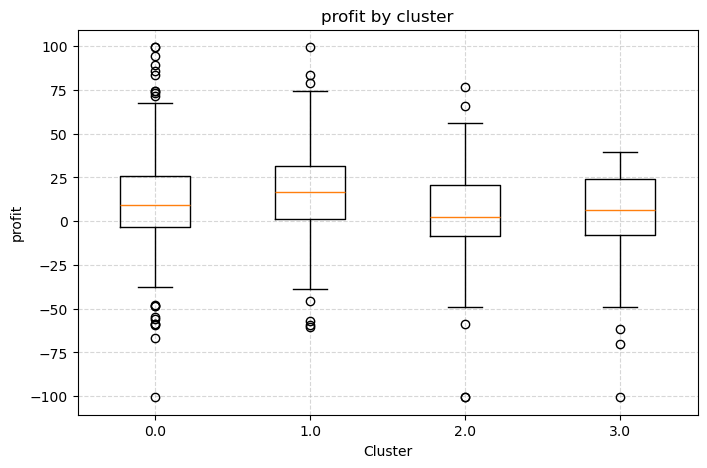

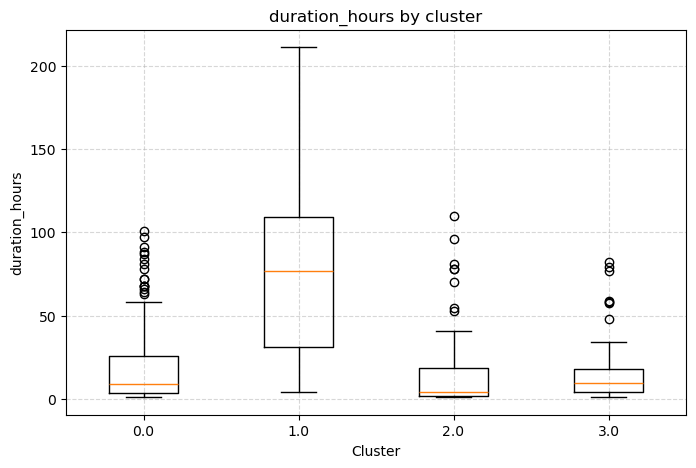

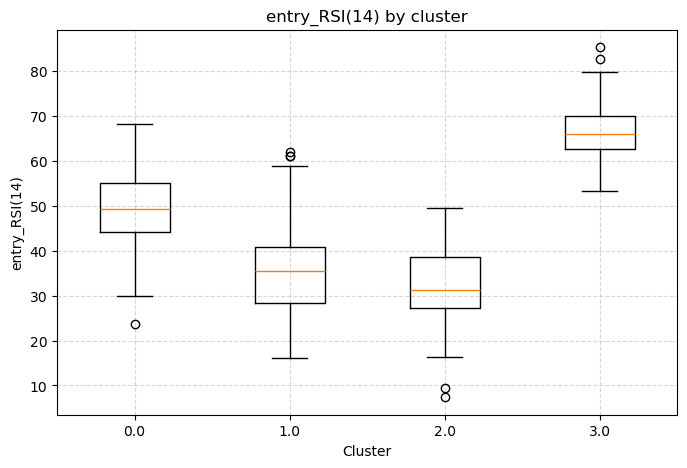

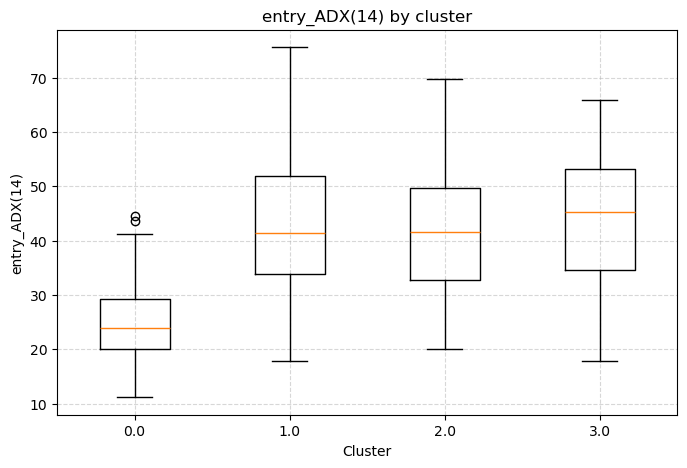

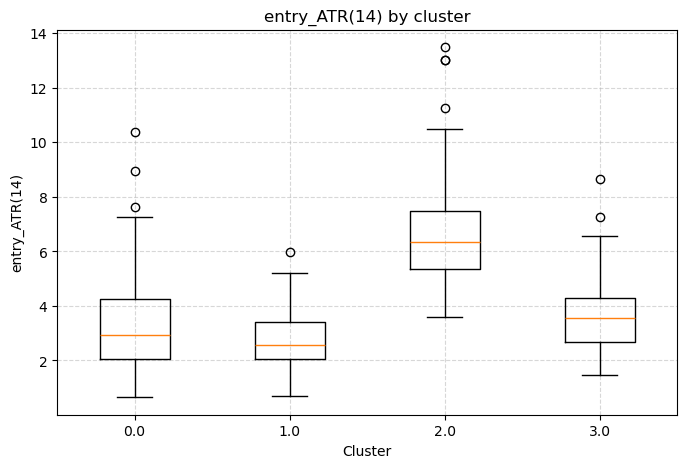

In [118]:
import matplotlib.pyplot as plt

metrics_to_plot = [
    "profit",
    "duration_hours",
    "entry_RSI(14)",
    "entry_ADX(14)",
    "entry_ATR(14)",
]

for metric in metrics_to_plot:
    plt.figure(figsize=(8, 5))
    
    data = [df[df["cluster"] == c][metric].dropna()
            for c in sorted(df["cluster"].unique())]
    
    plt.boxplot(data, labels=sorted(df["cluster"].unique()))
    plt.title(f"{metric} by cluster")
    plt.xlabel("Cluster")
    plt.ylabel(metric)
    plt.grid(True, linestyle="--", alpha=0.5)
    
    plt.show()


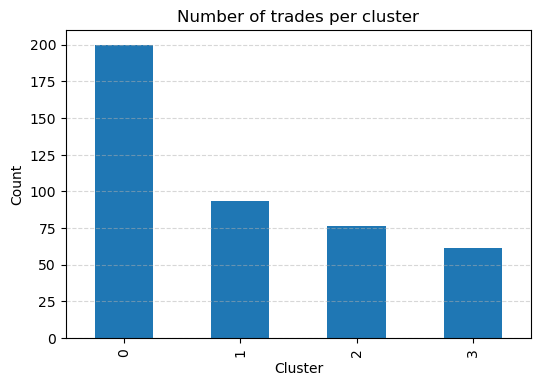

In [60]:
plt.figure(figsize=(6, 4))
df["cluster"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of trades per cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


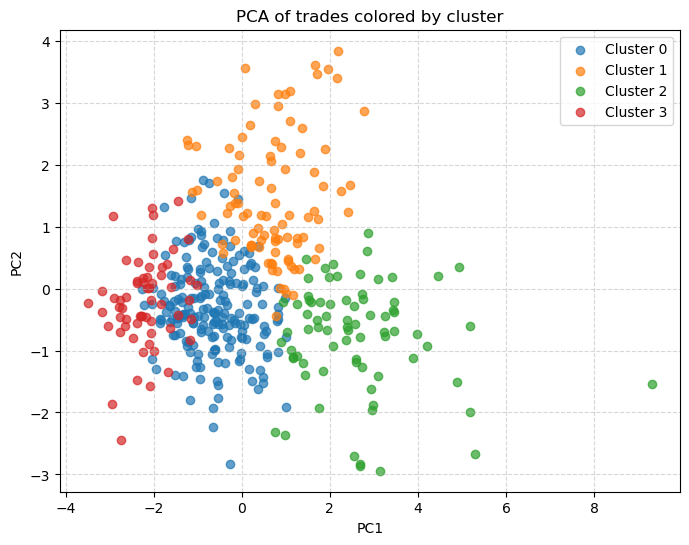

Explained variance by PC1 & PC2: [0.41996    0.18592753]


In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Same features used for clustering
feature_cols = [
    "profit",
    "duration_hours",
    "entry_RSI(14)",
    "entry_MACD Main",
    "entry_MACD Signal",
    "entry_ADX(14)",
    "entry_ATR(14)",
]

X = df[feature_cols].dropna().copy()
valid_idx = X.index
clusters = df.loc[valid_idx, "cluster"].astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
for c in sorted(clusters.unique()):
    mask = clusters == c
    plt.scatter(
        X_pca[mask, 0],
        X_pca[mask, 1],
        label=f"Cluster {c}",
        alpha=0.7,
    )

plt.title("PCA of trades colored by cluster")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

print("Explained variance by PC1 & PC2:", pca.explained_variance_ratio_)


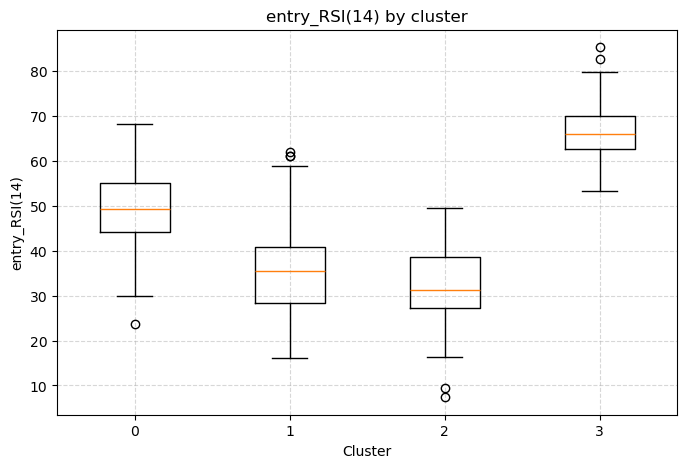

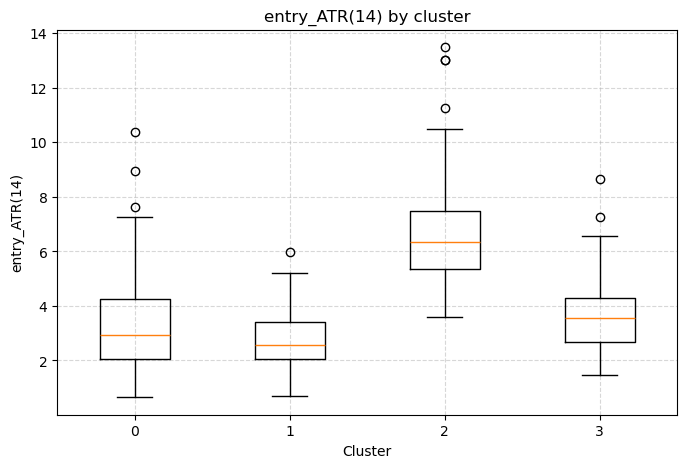

In [62]:
focus_metrics = ["entry_RSI(14)", "entry_ATR(14)"]

for metric in focus_metrics:
    plt.figure(figsize=(8, 5))
    data = [df[df["cluster"] == c][metric].dropna()
            for c in sorted(df["cluster"].unique())]
    
    plt.boxplot(data, labels=sorted(df["cluster"].unique()))
    plt.title(f"{metric} by cluster")
    plt.xlabel("Cluster")
    plt.ylabel(metric)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()


In [63]:
# Make sure cluster is int
df_valid = df.dropna(subset=["cluster"]).copy()
df_valid["cluster"] = df_valid["cluster"].astype(int)

# 1) List entry_order IDs per cluster
orders_per_cluster = (
    df_valid
    .groupby("cluster")["entry_order"]
    .apply(lambda x: sorted(x.unique()))
)

print("=== Entry orders per cluster ===")
for c, order_list in orders_per_cluster.items():
    print(f"\nCluster {c}: {len(order_list)} unique entry orders")
    print(order_list)  # show first 20 to avoid huge output


=== Entry orders per cluster ===

Cluster 0: 200 unique entry orders
[4, 9, 14, 19, 25, 26, 32, 44, 45, 48, 54, 56, 60, 62, 63, 65, 72, 74, 76, 82, 84, 85, 87, 88, 94, 96, 98, 100, 107, 109, 119, 125, 136, 145, 150, 154, 157, 160, 163, 170, 176, 177, 182, 184, 186, 188, 190, 192, 196, 206, 207, 208, 218, 219, 232, 233, 235, 246, 248, 250, 252, 256, 267, 269, 280, 284, 299, 303, 304, 305, 319, 320, 326, 330, 334, 336, 349, 356, 357, 360, 362, 365, 367, 374, 375, 380, 382, 384, 386, 389, 394, 406, 413, 415, 420, 433, 435, 442, 444, 456, 461, 473, 475, 482, 483, 487, 490, 495, 507, 512, 514, 519, 521, 523, 525, 527, 529, 545, 547, 549, 552, 557, 562, 564, 573, 576, 580, 582, 588, 590, 591, 593, 596, 598, 599, 601, 604, 606, 610, 611, 615, 619, 623, 628, 630, 638, 649, 652, 659, 662, 664, 668, 676, 678, 680, 684, 685, 690, 692, 698, 700, 702, 704, 706, 712, 714, 722, 724, 726, 728, 732, 738, 744, 748, 754, 758, 760, 764, 778, 790, 794, 797, 800, 806, 810, 811, 814, 816, 818, 822, 824, 825,

In [68]:
for c in sorted(df_valid["cluster"].unique()):
    subset = df_valid[df_valid["cluster"] == c]
    file_name = f"cluster_{c}_trades.csv"
    subset.to_csv(file_name, index=False)
    print(f"Saved {file_name} with {len(subset)} trades")

Saved cluster_0_trades.csv with 200 trades
Saved cluster_1_trades.csv with 93 trades
Saved cluster_2_trades.csv with 76 trades
Saved cluster_3_trades.csv with 61 trades


In [69]:
cluster_summary = (
    df_valid
    .groupby("cluster")
    .agg(
        Trade_Count=("entry_order", "count"),
        Avg_Profit=("profit", "mean"),
        Avg_Duration_Hours=("duration_hours", "mean"),
        Avg_Entry_RSI=("entry_RSI(14)", "mean"),
        Avg_Entry_ADX=("entry_ADX(14)", "mean"),
        Avg_Entry_ATR=("entry_ATR(14)", "mean"),
    )
    .round(2)
)

print(cluster_summary) 

         Trade_Count  Avg_Profit  Avg_Duration_Hours  Avg_Entry_RSI  Avg_Entry_ADX  Avg_Entry_ATR
cluster                                                                                          
0                200       11.59               18.35          49.45          24.87           3.28
1                 93       17.54               79.63          36.03          42.62           2.73
2                 76        3.93               15.78          32.52          41.60           6.65
3                 61        3.31               16.37          66.77          44.23           3.62


In [70]:
df['duration_hours']


0      13.911111
1      31.977778
2      49.000000
3      49.000000
4      46.000000
         ...    
425    22.000000
426    17.000000
427     4.000000
428     4.999722
429     2.999722
Name: duration_hours, Length: 430, dtype: float64

In [71]:
duration_stats = df_valid.groupby("cluster")["duration_hours"].describe()
duration_stats

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,200.0,18.347054,22.107474,1.0,3.405556,9.000000,26.002778,101.0
1,93.0,79.629809,54.466918,4.0,31.077778,77.000000,109.261111,211.0
2,76.0,15.784645,23.808185,1.0,2.000000,4.000000,18.250000,110.0
3,61.0,16.370219,20.023095,1.0,4.000000,9.477778,18.000000,82.0


In [72]:
indicator_means = df_valid.groupby("cluster")[
    ["entry_RSI(14)", "entry_MACD Main", "entry_ADX(14)", "entry_ATR(14)"]
].mean()
indicator_means

,entry_RSI(14),entry_MACD Main,entry_ADX(14),entry_ATR(14)
cluster,,,,
0,49.454380,-0.142865,24.871720,3.284546
1,36.025937,-2.354424,42.617625,2.726490
2,32.517611,-6.796565,41.598793,6.645113
3,66.773064,4.175717,44.228704,3.616756


In [73]:
atr_stats = df_valid.groupby("cluster")["entry_ATR(14)"].describe()
atr_stats

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,200.0,3.284546,1.665642,0.649286,2.044107,2.927143,4.252143,10.389286
1,93.0,2.726490,1.061572,0.707857,2.047143,2.580714,3.398571,5.967857
2,76.0,6.645113,2.076130,3.595000,5.353036,6.354643,7.473571,13.491429
3,61.0,3.616756,1.414925,1.447143,2.677143,3.560714,4.289286,8.662143


In [80]:

# Make sure entry_time is datetime in df_valid
df_valid["entry_time"] = pd.to_datetime(df_valid["entry_time"])

# Now this will work:
df_valid["entry_hour"] = df_valid["entry_time"].dt.hour

hour_counts = (
    df_valid
    .groupby("cluster")["entry_hour"]
    .value_counts(normalize=True)
    .sort_index()
)

print(hour_counts)

cluster  entry_hour
0        1             0.030000
         2             0.045000
         3             0.020000
         4             0.015000
         5             0.020000
         6             0.025000
         7             0.055000
         8             0.060000
         9             0.045000
         10            0.035000
         11            0.035000
         12            0.095000
         13            0.070000
         14            0.070000
         15            0.045000
         16            0.050000
         17            0.035000
         18            0.055000
         19            0.025000
         20            0.025000
         21            0.080000
         22            0.060000
         23            0.005000
1        1             0.053763
         2             0.032258
         3             0.010753
         4             0.032258
         5             0.053763
         6             0.010753
         7             0.032258
         8          

In [97]:
# Basic profit summary per cluster
profit_summary = (
    df_valid
    .groupby("cluster")["profit"]
    .agg(
        Trade_Count="count",
        Total_Profit="sum",
        Avg_Profit="mean",
        Median_Profit="median",
        Std_Profit="std"
    )
    .round(2)
)

print(profit_summary)


         Trade_Count  Total_Profit  Avg_Profit  Median_Profit  Std_Profit
cluster                                                                  
0                200       2318.39       11.59           9.34       30.03
1                 93       1630.88       17.54          16.84       29.62
2                 76        298.43        3.93           2.53       31.03
3                 61        201.72        3.31           6.12       28.68


In [96]:
df_valid["is_win"] = df_valid["profit"] > 0

profit_summary_with_win = (
    df_valid
    .groupby("cluster")
    .agg(
        Trade_Count=("profit", "count"),
        Total_Profit=("profit", "sum"),
        Avg_Profit=("profit", "mean"),
        Win_Rate=("is_win", "mean"),
    )
    .round(2)
)

print(profit_summary_with_win)

         Trade_Count  Total_Profit  Avg_Profit  Win_Rate
cluster                                                 
0                200       2318.39       11.59      0.70
1                 93       1630.88       17.54      0.76
2                 76        298.43        3.93      0.58
3                 61        201.72        3.31      0.61


In [82]:

df_valid["entry_day"] = df_valid["entry_time"].dt.day_name()
dow_counts = df_valid.groupby("cluster")["entry_day"].value_counts(normalize=True)
dow_counts



cluster  entry_day
0        Thursday     0.245000
         Tuesday      0.205000
         Monday       0.190000
         Wednesday    0.180000
         Friday       0.180000
1        Monday       0.301075
         Friday       0.268817
         Wednesday    0.150538
         Thursday     0.150538
         Tuesday      0.129032
2        Thursday     0.276316
         Tuesday      0.236842
         Friday       0.197368
         Monday       0.144737
         Wednesday    0.144737
3        Monday       0.278689
         Wednesday    0.262295
         Tuesday      0.229508
         Thursday     0.180328
         Friday       0.049180
Name: proportion, dtype: float64

In [93]:

import pandas as pd

profit_stats = df_valid.groupby("cluster")["profit"].describe()
profit_skew = df_valid.groupby("cluster")["profit"].skew()
profit_kurtosis = df_valid.groupby("cluster")["profit"].agg(pd.Series.kurtosis)

print(profit_stats)
print("\nSkew by cluster:\n", profit_skew)
print("\nKurtosis by cluster:\n", profit_kurtosis)


         count       mean        std     min     25%    50%    75%    max
cluster                                                                  
0        200.0  11.591950  30.032642 -100.56 -3.2950   9.34  25.58  99.36
1         93.0  17.536344  29.620921  -60.55  1.2300  16.84  31.48  99.33
2         76.0   3.926711  31.033865 -100.41 -8.5575   2.53  20.85  76.51
3         61.0   3.306885  28.681038 -100.41 -7.7300   6.12  23.94  39.28

Skew by cluster:
 cluster
0    0.046854
1   -0.056334
2   -0.752148
3   -1.303754
Name: profit, dtype: float64

Kurtosis by cluster:
 cluster
0    1.749464
1    0.904662
2    2.340756
3    2.330532
Name: profit, dtype: float64


In [94]:
cluster_summary = df_valid.groupby("cluster")[["profit", "duration_hours", "entry_RSI(14)", "entry_ADX(14)", "entry_ATR(14)"]].describe().round(2)
print(cluster_summary)


        profit                                                  duration_hours                                   \
         count   mean    std     min   25%    50%    75%    max          count   mean    std  min    25%    50%   
cluster                                                                                                           
0        200.0  11.59  30.03 -100.56 -3.30   9.34  25.58  99.36          200.0  18.35  22.11  1.0   3.41   9.00   
1         93.0  17.54  29.62  -60.55  1.23  16.84  31.48  99.33           93.0  79.63  54.47  4.0  31.08  77.00   
2         76.0   3.93  31.03 -100.41 -8.56   2.53  20.85  76.51           76.0  15.78  23.81  1.0   2.00   4.00   
3         61.0   3.31  28.68 -100.41 -7.73   6.12  23.94  39.28           61.0  16.37  20.02  1.0   4.00   9.48   

                       entry_RSI(14)                                                 entry_ADX(14)                \
            75%    max         count   mean   std    min    25%    50%    75% 

In [95]:
total_profit = df_valid.groupby("cluster")["profit"].sum()
total_profit




cluster
0    2318.39
1    1630.88
2     298.43
3     201.72
Name: profit, dtype: float64

In [99]:
# Make sure entry_hour exists
df_valid["entry_hour"] = df_valid["entry_time"].dt.hour

hour_dist = (
    df_valid
    .groupby("cluster")["entry_hour"]
    .value_counts(normalize=True)
    .rename("freq")
    .reset_index()
)

# Get top 5 hours per cluster by frequency
top5_hours_per_cluster = (
    hour_dist
    .sort_values(["cluster", "freq"], ascending=[True, False])
    .groupby("cluster")
    .head(3)
)

print(top5_hours_per_cluster)




    cluster  entry_hour      freq
0         0          12  0.095000
1         0          21  0.080000
2         0          14  0.070000
23        1          16  0.107527
24        1          15  0.107527
25        1          20  0.075269
44        2          16  0.105263
45        2          19  0.105263
46        2          12  0.078947
65        3          16  0.114754
66        3          12  0.114754
67        3          20  0.098361


In [102]:
df_valid["entry_weekday"] = df_valid["entry_time"].dt.dayofweek

best_day_per_cluster = (
    df_valid.groupby("cluster")["entry_weekday"]
    .value_counts(normalize=True)
    .groupby(level=0)
    .head(1)     # most common day
    .reset_index(name="freq")
)

weekday_names = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
best_day_per_cluster["weekday_name"] = best_day_per_cluster["entry_weekday"].apply(lambda x: weekday_names[x])
best_day_per_cluster

,cluster,entry_weekday,freq,weekday_name
0,0,3,0.245000,Thu
1,1,0,0.301075,Mon
2,2,3,0.276316,Thu
3,3,0,0.278689,Mon


In [ ]:
#pushed to git this part need a quick revision before moving to next question 
